In [80]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [134]:
#importing an excel file
dataset = pd.read_excel("CollectedData (1).xlsx",sheet_name = 1)

In [135]:
dataset.head()

,8,1,Unnamed: 2,0,1993,146,Unnamed: 6,2,1.1,Unnamed: 9,...,Unnamed: 70,15.3,7.8,11.55,58,100,79,15.4,8.1,11.7
0,8.0,2.0,NaN,0.0,1993.0,146.0,NaN,2.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
1,8.0,3.0,NaN,0.0,1993.0,146.0,NaN,1.0,2.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.5,8.1,11.80
2,8.0,4.0,NaN,0.0,1993.0,146.0,NaN,3.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
3,8.0,5.0,NaN,0.0,1993.0,146.0,NaN,3.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
4,8.0,6.0,NaN,0.0,1993.0,146.0,NaN,1.0,2.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.6,8.3,11.95


In [168]:
dataset.dtypes

Age          float64
Met          float64
Ta           float64
Tmrt         float64
AirTurb      float64
Pa           float64
Rh           float64
TaOutdoor    float64
RhOutdoor    float64
AMV          float64
PMV          float64
dtype: object

In [136]:
mapping = {dataset.columns[3]:'Age', dataset.columns[22]:'Clo',dataset.columns[20]:'Met',dataset.columns[26]:'Dewpt',dataset.columns[27]:'PlaneRadTemp',dataset.columns[37]:'Ta',dataset.columns[38]:'Tmrt',dataset.columns[40]:'Vel',dataset.columns[42]:'AirTurb',dataset.columns[43]:'Pa',dataset.columns[44]:'Rh',dataset.columns[74]:'TaOutdoor',dataset.columns[77]:'RhOutdoor',dataset.columns[8]:'AMV',dataset.columns[49]:'PMV'}
dataset = dataset.rename(columns=mapping)
dataset.head()

,8,1,Unnamed: 2,Age,1993,146,Unnamed: 6,2,AMV,Unnamed: 9,...,Unnamed: 70,15.3,7.8,11.55,TaOutdoor,100,79,RhOutdoor,8.1,11.7
0,8.0,2.0,NaN,0.0,1993.0,146.0,NaN,2.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
1,8.0,3.0,NaN,0.0,1993.0,146.0,NaN,1.0,2.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.5,8.1,11.80
2,8.0,4.0,NaN,0.0,1993.0,146.0,NaN,3.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
3,8.0,5.0,NaN,0.0,1993.0,146.0,NaN,3.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
4,8.0,6.0,NaN,0.0,1993.0,146.0,NaN,1.0,2.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.6,8.3,11.95


In [137]:
dataset = dataset[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']]
dataset.head(3)

,Age,Clo,Met,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,0.0,19.1,0.15,NaN,19.6,19.629472,19.364736,NaN,NaN,51.3,19.3,58.0,15.4,1.0,0.10
1,0.0,20.0,0.15,NaN,19.1,19.046655,19.523328,NaN,NaN,51.9,19.8,58.0,15.5,2.0,0.18
2,0.0,21.0,0.15,NaN,20.2,20.153116,20.576558,NaN,NaN,49.9,20.7,58.0,15.4,1.0,0.17


In [138]:
dataset.shape

(12565, 15)

In [139]:
#checking for data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           12340 non-null  float64
 1   Clo           5676 non-null   float64
 2   Met           12530 non-null  float64
 3   Dewpt         5544 non-null   float64
 4   PlaneRadTemp  5676 non-null   float64
 5   Ta            8864 non-null   float64
 6   Tmrt          9337 non-null   float64
 7   Vel           5561 non-null   float64
 8   AirTurb       7910 non-null   float64
 9   Pa            12530 non-null  float64
 10  Rh            12520 non-null  float64
 11  TaOutdoor     12546 non-null  float64
 12  RhOutdoor     12545 non-null  float64
 13  AMV           12514 non-null  float64
 14  PMV           11176 non-null  float64
dtypes: float64(15)
memory usage: 1.4 MB


In [140]:
dataset.describe()

,Age,Clo,Met,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
count,12340.000000,5676.000000,12530.000000,5544.000000,5676.000000,8864.000000,9337.000000,5561.000000,7910.000000,12530.000000,12520.000000,12546.000000,12545.000000,12514.000000,11176.000000
mean,17.738250,23.189087,2.623459,0.217785,23.246785,23.450693,23.457478,0.142601,5.123996,42.528507,20.746623,56.622620,18.743268,1.857599,0.112912
std,64.558478,1.239943,7.124288,1.041164,1.219853,1.502489,1.564633,0.100764,8.156136,15.061475,7.406334,18.121491,12.801067,0.414922,0.104416
min,-1.000000,15.960000,0.000000,-7.420000,16.410000,16.610000,16.639117,0.000000,0.000000,7.400000,-0.620000,6.100000,-22.700000,1.000000,0.000000
25%,0.000000,22.520000,0.150000,-0.230000,22.600000,22.589671,22.539210,0.086000,1.226667,29.300000,21.900000,45.100000,9.400000,2.000000,0.060000
50%,1.000000,23.200000,0.150000,0.200000,23.240000,23.359219,23.305000,0.120000,1.550667,43.276815,22.900000,59.000000,21.200000,2.000000,0.071050
75%,1.000000,23.850000,0.150000,0.600000,23.900000,24.250000,24.215000,0.176000,1.985333,55.500188,23.900000,67.000000,30.000000,2.000000,0.127525
max,292.000000,29.810000,26.994500,11.700000,30.850000,37.445000,31.800000,1.814000,27.700000,79.300000,32.900000,100.000000,37.800000,3.000000,1.000000


In [141]:
print("null values in columns\n",dataset.isna().sum())

null values in columns
 Age              225
Clo             6889
Met               35
Dewpt           7021
PlaneRadTemp    6889
Ta              3701
Tmrt            3228
Vel             7004
AirTurb         4655
Pa                35
Rh                45
TaOutdoor         19
RhOutdoor         20
AMV               51
PMV             1389
dtype: int64


In [142]:
# dataset having more than 50 percent null values in column are discarded
dataset = dataset[['Age','Met','Ta','Tmrt','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']]
#filling the dataset values with average values in dataset

dataset = dataset.fillna(dataset.mean(numeric_only = True))
print("Null values in columns after removing are")
display(dataset.isna().sum())

Null values in columns after removing are


Age          0
Met          0
Ta           0
Tmrt         0
AirTurb      0
Pa           0
Rh           0
TaOutdoor    0
RhOutdoor    0
AMV          0
PMV          0
dtype: int64

In [55]:
'''
# copy the data
dataframe_scaled = dataset.copy()
  
# apply normalization technique of max scalar
#we will subtract the min value in the feature and then divide by its range
for column in dataframe_scaled.columns:
    dataframe_scaled[column] = dataframe_scaled[column]  / dataframe_scaled[column].abs().max()
      
# view normalized data
display(dataframe_scaled)
'''

,Age,Met,Ta,Tmrt,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,0.000000,0.005557,0.524221,0.608954,0.184982,0.646910,0.586626,0.58,0.407407,0.333333,0.100000
1,0.000000,0.005557,0.508657,0.613941,0.184982,0.654477,0.601824,0.58,0.410053,0.666667,0.180000
2,0.000000,0.005557,0.538206,0.647062,0.184982,0.629256,0.629179,0.58,0.407407,0.333333,0.170000
3,0.000000,0.005557,0.585992,0.706642,0.184982,0.575032,0.683891,0.58,0.407407,0.333333,0.490000
4,0.000000,0.005557,0.518877,0.616813,0.184982,0.648172,0.598784,0.58,0.412698,0.666667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...
12560,0.109589,0.821371,0.626270,0.737657,0.805054,0.288777,-0.003040,0.68,0.000000,1.000000,0.112912
12561,0.109589,0.821371,0.626270,0.737657,0.805054,0.269861,-0.005471,0.68,0.000000,1.000000,0.112912
12562,0.109589,0.821371,0.626270,0.737657,0.805054,0.291299,-0.002736,0.68,0.000000,1.000000,0.112912
12563,0.109589,0.821371,0.626270,0.737657,0.805054,0.277427,-0.004559,0.68,0.000000,0.666667,0.112912


In [143]:
dataframe_scaled.describe()

,Age,Met,Ta,Tmrt,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
count,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000
mean,0.060747,0.097185,0.626270,0.737657,0.184982,0.536299,0.630596,0.566226,0.495854,0.619200,0.112912
std,0.219102,0.263548,0.033701,0.042413,0.233615,0.189666,0.224713,0.181078,0.338383,0.138026,0.098476
min,-0.003425,0.000000,0.443584,0.523243,0.000000,0.093317,-0.018845,0.061000,-0.600529,0.333333,0.000000
25%,0.000000,0.005557,0.611989,0.717925,0.051764,0.370744,0.665653,0.451000,0.248677,0.666667,0.060000
50%,0.003425,0.005557,0.626270,0.737657,0.075812,0.544893,0.696049,0.590000,0.560847,0.666667,0.080000
75%,0.003425,0.005557,0.636310,0.750157,0.184982,0.699369,0.726444,0.670000,0.793651,0.666667,0.117700
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
variances = dataframe_scaled.var()
display(variances)

Age          0.048006
Met          0.069458
Ta           0.001136
Tmrt         0.001799
AirTurb      0.054576
Pa           0.035973
Rh           0.050496
TaOutdoor    0.032789
RhOutdoor    0.114503
AMV          0.019051
PMV          0.009697
dtype: float64

In [144]:
print("Mode of dataset is:\n ")
display(dataset.mode())
null = dataset.isna().sum().sum()
print("Null values in dataset are", null)

Mode of dataset is:
 


,Age,Met,Ta,Tmrt,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,1.0,0.15,23.450693,23.457478,5.123996,64.0,22.8,55.0,0.0,2.0,0.05


Null values in dataset are 0


In [145]:
#new initialization of dataset after normalization and removing null values
#dataset = dataframe_scaled
print(dataset.shape)

(12565, 11)


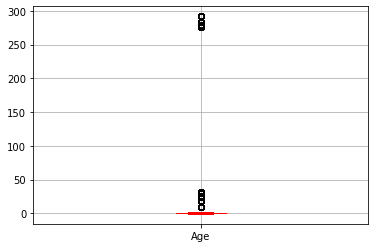

KeyError: "None of [Index(['Clo'], dtype='object')] are in the [columns]"

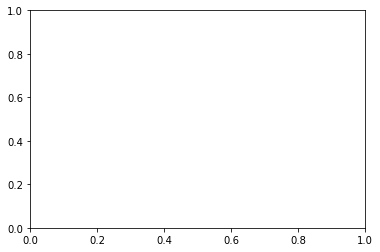

In [146]:
#outlier removing
#detection by using boxplot
# with colors
age = dataset.boxplot(column = 'Age',color = 'red')
age.plot()
plt.show()

clo = dataset.boxplot(column = 'Clo',color = 'black')
clo.plot()
plt.show()

Met = dataset.boxplot(column = 'Met',color = 'red')
Met.plot()
plt.show()

Planerad = dataset.boxplot(column = 'PlaneRadTemp',color = 'green')
Planerad.plot()
plt.show()

Ta = dataset.boxplot(column = 'Ta',color = 'red')
Ta.plot()
plt.show()

Tmrt = dataset.boxplot(column = 'Tmrt',color = 'black')
Tmrt.plot()
plt.show()

vel = dataset.boxplot(column = 'Vel',color = 'blue')
vel.plot()
plt.show()

Airturb = dataset.boxplot(column = 'AirTurb',color = 'red')
Airturb.plot()
plt.show()

Pa = dataset.boxplot(column = 'Pa',color = 'green')
Pa.plot()
plt.show()

Rh = dataset.boxplot(column = 'Rh',color = 'black')
Rh.plot()
plt.show()

Taout = dataset.boxplot(column = 'TaOutdoor',color = 'red')
Taout.plot()
plt.show()

Amv = dataset.boxplot(column = 'AMV',color = 'green')
Amv.plot()
plt.show()

PMV = dataset.boxplot(column = 'PMV',color = 'yellow')
PMV.plot()
plt.show()

In [147]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

dataset_removed_outlier = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q1 + 1.5 * IQR))).any(axis=1)]
    
dataset_removed_outlier.shape

(3960, 11)

In [148]:
variance = dataset.var()

var=[]
for x in range(0,len(variance)):
    if variance[x] >= 0.6:
        var.append(dataset.columns[x])

In [149]:
dataset

,Age,Met,Ta,Tmrt,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,0.0,0.1500,19.629472,19.364736,5.123996,51.3,19.30,58.0,15.4,1.0,0.100000
1,0.0,0.1500,19.046655,19.523328,5.123996,51.9,19.80,58.0,15.5,2.0,0.180000
2,0.0,0.1500,20.153116,20.576558,5.123996,49.9,20.70,58.0,15.4,1.0,0.170000
3,0.0,0.1500,21.942458,22.471229,5.123996,45.6,22.50,58.0,15.4,1.0,0.490000
4,0.0,0.1500,19.429333,19.614666,5.123996,51.4,19.70,58.0,15.6,2.0,0.250000
...,...,...,...,...,...,...,...,...,...,...,...
12560,32.0,22.1725,23.450693,23.457478,22.300000,22.9,-0.10,68.0,0.0,3.0,0.112912
12561,32.0,22.1725,23.450693,23.457478,22.300000,21.4,-0.18,68.0,0.0,3.0,0.112912
12562,32.0,22.1725,23.450693,23.457478,22.300000,23.1,-0.09,68.0,0.0,3.0,0.112912
12563,32.0,22.1725,23.450693,23.457478,22.300000,22.0,-0.15,68.0,0.0,2.0,0.112912


In [150]:
print(variance)

Age          4093.158910
Met            50.614095
Ta              1.592486
Tmrt            1.819105
AirTurb        41.875752
Pa            226.216078
Rh             54.657319
TaOutdoor     327.891822
RhOutdoor     163.606472
AMV             0.171462
PMV             0.009697
dtype: float64


In [151]:
var

['Age', 'Met', 'Ta', 'Tmrt', 'AirTurb', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']

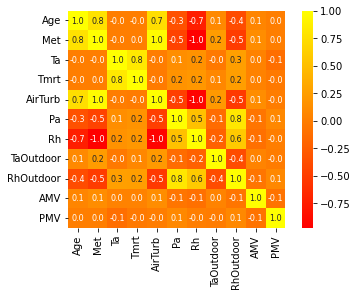

In [152]:
#6A
import seaborn as sns
correlation=dataset.corr()
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="autumn")
plt.show()

In [153]:
dataset.head()

,Age,Met,Ta,Tmrt,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,0.0,0.15,19.629472,19.364736,5.123996,51.3,19.3,58.0,15.4,1.0,0.10
1,0.0,0.15,19.046655,19.523328,5.123996,51.9,19.8,58.0,15.5,2.0,0.18
2,0.0,0.15,20.153116,20.576558,5.123996,49.9,20.7,58.0,15.4,1.0,0.17
3,0.0,0.15,21.942458,22.471229,5.123996,45.6,22.5,58.0,15.4,1.0,0.49
4,0.0,0.15,19.429333,19.614666,5.123996,51.4,19.7,58.0,15.6,2.0,0.25


In [166]:
#Entropy/Information gain
#mi = mutual_info_classif(dataset)
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import mutual_info_classif

X_train,X_test,y_train,y_test=train_test_split(dataset.drop(labels=['PMV'], axis=1),dataset['PMV'],test_size=0.2,random_state=0)
X_train

,Age,Met,Ta,Tmrt,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV
2363,0.0,0.15,26.180000,25.090000,1.545501,51.813161,25.2,57.787800,28.8,1.0
2016,0.0,0.22,21.900000,22.500000,0.552000,19.300000,22.1,88.000000,-5.1,1.0
9355,0.0,0.15,23.913746,23.656873,1.461000,50.800000,23.7,67.000000,32.5,2.0
9672,1.0,0.15,21.730000,21.618030,5.123996,23.984310,21.3,37.000000,18.2,2.0
3848,1.0,0.15,24.150000,22.625000,1.700606,67.998334,23.0,65.083050,33.6,2.0
...,...,...,...,...,...,...,...,...,...,...
4859,0.0,0.15,23.450693,23.457478,5.123996,26.700000,22.7,66.900000,8.4,1.0
3264,1.0,0.15,24.000000,24.000000,1.246466,41.787959,23.7,29.472378,28.4,2.0
9845,1.0,0.15,21.380000,21.361350,5.123996,26.987570,21.1,58.000000,10.0,2.0
10799,1.0,0.15,24.379320,24.229660,5.123996,44.430000,24.0,24.200000,30.2,2.0


In [167]:
from sklearn import tree
x = dataset.drop(labels=['PMV'], axis=1)
y=dataset['PMV']
model = tree.DecisionTreeClassifier().fit(x,y)
print(model.score(x,y))

ValueError: Unknown label type: 'continuous'